In [258]:
from keras.models import load_model
import tensorflow as tf
import os
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [233]:
model_dir = "C:/Users/Max/Documents/GitHub/ResNet/ResNet-kaggle-v003/model.h5"

model = load_model(model_dir)
model.compile(optimizer='adam', loss='losses.sparse_categorical_crossentropy', metrics=['accuracy'])

In [330]:
index_1 = model_dir.find('/', 30) + 1
index_2 = model_dir.find('/', index_1)
index_3 = model_dir.find('-', index_1)
model_type = model_dir[index_1:index_2]
trimmed_model_type = model_dir[index_1:index_3]

print(model_type)
print(trimmed_model_type)

ResNet-kaggle-v003
ResNet


In [234]:
data_dir = "C:/Users/Max/Documents/gan_images"

In [235]:
ih, iw = 64, 64

In [295]:
rw_imgs = np.array([])
rw_family = np.array([])
rw_labels = np.array([]).astype("int32")

b_imgs = np.array([])
b_family = np.array([])
b_labels = np.array([]).astype("int32")

imgs = np.array([])
family = np.array([])
labels = np.array([]).astype("int32")

i = 0

In [296]:
for i, file in enumerate(os.listdir(data_dir)):
    path = f"{data_dir}/{file}"
    img = image.load_img(f'{data_dir}/{file}', target_size=(iw,ih))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    
    images = np.vstack([x])
    p = model.predict(images)
    
    print(f"Progress: {i}")
    
    imgs = np.append(imgs, path)
    labels = np.append(labels, q)

    if np.any(p>0.5):
        q = p.argmax()
        q = int(q)
        if not q == 10:
            rw_imgs = np.append(rw_imgs, path)
            rw_labels = np.append(rw_labels, q)
        if q == 10:
            b_imgs = np.append(b_imgs, path)
            b_labels = np.append(b_labels, q)
        
imgs_labels = pd.DataFrame({'file': imgs, 'label': labels}, columns=['file', 'label'])

Progress: 0
Progress: 1
Progress: 2
Progress: 3
Progress: 4
Progress: 5
Progress: 6
Progress: 7
Progress: 8
Progress: 9
Progress: 10
Progress: 11
Progress: 12
Progress: 13
Progress: 14
Progress: 15
Progress: 16
Progress: 17
Progress: 18
Progress: 19
Progress: 20
Progress: 21
Progress: 22
Progress: 23
Progress: 24
Progress: 25
Progress: 26
Progress: 27
Progress: 28
Progress: 29
Progress: 30
Progress: 31
Progress: 32
Progress: 33
Progress: 34
Progress: 35
Progress: 36
Progress: 37
Progress: 38
Progress: 39
Progress: 40
Progress: 41
Progress: 42
Progress: 43
Progress: 44
Progress: 45
Progress: 46
Progress: 47
Progress: 48
Progress: 49
Progress: 50
Progress: 51
Progress: 52
Progress: 53
Progress: 54
Progress: 55
Progress: 56
Progress: 57
Progress: 58
Progress: 59
Progress: 60
Progress: 61
Progress: 62
Progress: 63
Progress: 64
Progress: 65
Progress: 66
Progress: 67
Progress: 68
Progress: 69
Progress: 70
Progress: 71
Progress: 72
Progress: 73
Progress: 74
Progress: 75
Progress: 76
Progress:

In [303]:
imgs_labels

,file,label
0,C:/Users/Max/Documents/gan_images/generated_im...,10
1,C:/Users/Max/Documents/gan_images/generated_im...,10
2,C:/Users/Max/Documents/gan_images/generated_im...,10
3,C:/Users/Max/Documents/gan_images/generated_im...,10
4,C:/Users/Max/Documents/gan_images/generated_im...,0
...,...,...
92,C:/Users/Max/Documents/gan_images/generated_im...,10
93,C:/Users/Max/Documents/gan_images/generated_im...,10
94,C:/Users/Max/Documents/gan_images/generated_im...,10
95,C:/Users/Max/Documents/gan_images/generated_im...,10


In [321]:
df = imgs_labels.groupby('label').count()


TypeError: count() got an unexpected keyword argument 'normalize'

In [328]:
df = imgs_labels['label'].value_counts(normalize=True, sort=False)

(0.0, 1.0)

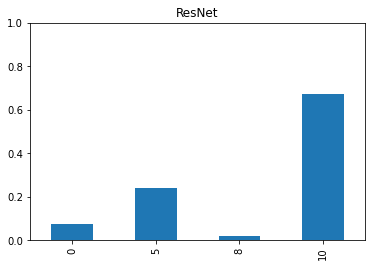

In [332]:
df.plot(kind = 'bar')
plt.title(trimmed_model_type)
plt.ylim([0,1])